<a id='top'></a>

# CSCI3022 F20
# Homework 6: Confidence Intervals
***

**Name**: ________________________________________________________________________

***

This assignment is due on Canvas by **MIDNIGHT on Monday November 2**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available under the **Data** module on Canvas, as well as in the zipped folder in which you obtained this assignment. 
- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Because you can technically evaluate notebook cells in a non-linear order, it's a good idea to do Kernel $\rightarrow$ Restart & Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- You **MUST** leave all of your notebook cells **evaluated** so the graders do not need to re-evaluate them. For 100+ students, this extra time adds up, and makes the graders' lives unnecessarily more difficult.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 
- Submit only this Jupyter notebook to Canvas.  Do not compress it using tar, rar, zip, etc. 

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) | 
---

In [3]:
import numpy as np
import math
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

<br>

---
<a/ id='p2'></a>
[Back to top](#top)
## [20 points] Problem 1 - Random Samples from ANYWHERE


In notebook 12, we looked at one method many pieces of statistical software use to turn pseudorandom numbers coming from the $U(0,1)$ distribution into those with a normal distribution.  In this problem we examine another such method.

### a) Simulating an Exponential
#### i ) The exponential distribution has pdf $f(x)= \lambda e^{-\lambda x}$ for $x\ge 0$.  Use the following markdown cell to compute by hand the cdf of the exponential.

$$\int_{0}^{x} \lambda e^{- \lambda t} dt = 1-e^{-\lambda x}$$


#### ii) The cdf is a function that takes x-values (or times, in the case of the exponential) and returns probabilities as the y-values.  Specifically, it returns the probability $P(X \leq x)$.  Find the *inverse* of this function, that takes as input probabilities and outputs times.

$$1-e^{-\lambda F^{-1}(x)} = x$$
$$F^{-1}(x) = \frac{ln(1-x)}{-\lambda}$$


#### iii) Simulate 1000 random $U(0,1)$ variables.  Since these are numbers in $[0,1]$, we could think of them as random *probabilities*.  Plug them into the function you found in ii), then plot a histogram of the results.  Overlay the theoretical density of the exponential.  For each of these, use $\lambda=1/4$.

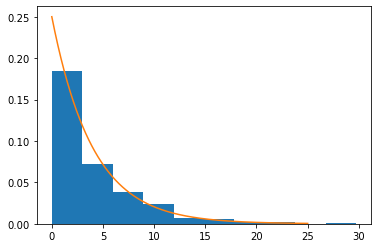

In [4]:
nums = np.random.uniform(0, 1, 1000)
lam = 1/4
inv = lambda x: np.log(1-x)/-lam
results = inv(nums)
plt.hist(results, density=True)
pdf = lambda x: lam * np.e**(-lam * x)
xs = np.linspace(0,25,500)
plt.plot(xs, pdf(xs))
plt.show()

### b) Simulating a new distribution
#### i) Consider a continuous random variable given by $f(x)=cos(x)$ for $x \in [0, \pi/2]$.  Find the cdf and inverse cdf of X.

$$F(x) = sin(x)$$
$$F^{-1}(x) = arcsin(x)$$


#### ii) Simulate draws from X by simulating 1000 $U[0,1]$ random variables and plugging them into the inverse cdf in i).  As in part a), plot a histogram of the random variables against their density function.

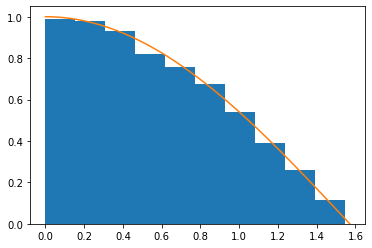

In [5]:
nums = np.random.uniform(0, 1, 10000)
lam = 1/4
inv = np.arcsin
results = inv(nums)
plt.hist(results, density=True)
pdf = np.cos
xs = np.linspace(0,np.pi/2,500)
plt.plot(xs, pdf(xs))
plt.show()

### c) Backwards Normals

The process we're following could be summarized as follows, referencing functions we know for many distributions:

- Sample from U(0,1)
- Plug those samples each into the .ppf ("Percentile Point Function," or inverse of the CDF) for the random variable.
- Save the output

Now, follow this process for normal random variables.  Sample 1000 random normal variables using `norm.rvs` and then generate 100 random normal variable by transforming 1000 random variables from their `norm.ppfs`.  Plot both samples in an overlapping histogram.

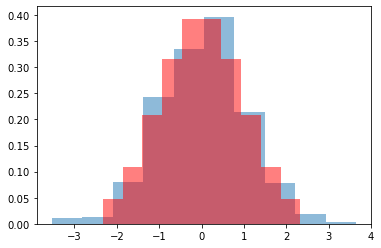

In [162]:
# samples = [stats.norm.rvs() for x in range(1000)]
# probsamples = np.random.uniform(0, 1, 10000)
# plt.hist(samples, alpha=.5)
# ppf = stats.norm.ppf(probsamples)
# plt.hist(ppf, alpha=.5, color='r')
# plt.show()

samples = stats.norm(0,1).rvs(size=1000)
plt.hist(samples, alpha=.5, density=True)
ppf = stats.norm.ppf(np.linspace(0.01, 0.99, 1000))
plt.hist(ppf, alpha=.5, color='r', density=True)
plt.show()

### d) Generalizing

Describe in words how this process might work on a discrete random variable.  It is optional but may be useful to use the Bernoulli as an example or implement this process in code.

The only main difference in implementation comes down to how we choose the values we are sampling. When working discretely, we can use weighted choices rather than continuous random selections.

<br>

---
<a/ id='p2'></a>
[Back to top](#top)
## [20 points] Problem 2 - Exploring Confidence Intervals 

The [Gamma](https://en.wikipedia.org/wiki/Gamma_distribution) distribution is one of several distributions frequently used to model event times, as it's the sum of exponentials.  It can also be fairly asymmetric, and thus interesting for investigating confidence intervals.  It is implemented in scipy.stats as [gamma](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gamma.html).  (NB: check the links!)

**Part A**: Complete the following code cell to plot a histogram of 100 realizations from the Gamma distribution with parameters $k=4$ (a) and $\theta=10$ (scale).  Be sure to leave this cell executed before turning in your assignment! Make your histogram faces gray with blue edges.

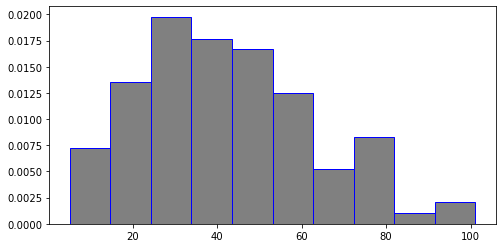

In [172]:
#GIVEN CODE (updated):
k = 4
theta = 10
n_sample = 100
x = stats.gamma(a=4, scale=10).rvs(size=100)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,4), )
# Your code goes here!
ax.hist(x, color='gray', edgecolor='blue', density=True)
plt.show()

**Part B:** Look up the analytical mean and variance (from the documentation or wiki) of the Gamma distribution with parameters $k=4$ and $\theta=10$ and calculate them here by hand.

Use the empirical mean from your sample in **Part A**, and the true variance of the Gamma distribution to compute by hand a 95% confidence interval for the mean.

**Analytical Results in this cell.**

In [179]:
#Your CI
k = 4
theta = 10
mean = k * theta
variance = k * theta ** 2
emp_mean = x.mean()
emp_var = x.var()

print(f"Theoretic mean vs Empirical Mean: {mean} - {emp_mean}")
print(f"Theoretic variance vs Empirical variance: {variance} - {emp_var}")

z = 1.960 # 1.960 z for 95% confidence
det = z * x.std() / len(x)**.5
bounds = (emp_mean - det, emp_mean + det)

ddet = z * variance**.5 / len(x)**.5
dbounds = mean - ddet, mean + ddet
print(f"Empirical Interval of 95% confidence: [{bounds[0]}, {bounds[1]}]")
print(f"Real Interval of 95% confidence: [{dbounds[0]}, {dbounds[1]}]")

Theoretic mean vs Empirical Mean: 40 - 42.65687016195827
Theoretic variance vs Empirical variance: 400 - 410.3848538699762
Empirical Interval of 95% confidence: [38.68631043488338, 46.62742988903315]
Real Interval of 95% confidence: [36.08, 43.92]


**Part C:  A theoretical interlude.** When Lola, the famous Beagle data scientist, ran her solution code for **Part B**, she obtained a 95% confidence interval of $[38.5, 40.5]$ for the mean of the $Gamma(k=4, \theta=10)$ distribution. For each of the following, explain why or why not the situation described is correct, given the technical definition of a 95% confidence interval we went over in class.

**(i)** If you had no other evidence regarding true mean of the $Gamma(k=4, \theta=10)$ distribution, you could say there is a 95% chance that its true mean falls between 38.5 and 40.5.

**(ii)** If a class of 100 students all construct 95% confidence intervals for the mean of the $Gamma(k=4, \theta=10)$ distribution, then we expect about 95 of their CIs to contain the true mean, and about 5 of them to miss the true mean.

**(iii)** If we sample 100 random variables from the $Gamma(k=4, \theta=10)$ distribution, then roughly 95% of them will be between 38.5 and 40.5.

i. Yes, there is a 95% chance that the confidence interval given by Lola contains the true mean.
ii. Yes, the confidence interval measures also the percentage of confidence intervals that should contain the mean.
iii. This is not what the definition of confidence interval implies. Confidence interval discusses the mean of a dataset, not the individual values and their likely locations.

**Part D:** In this part you'll write a function to investigate the _coverage properties_ of a confidence interval for the mean of the Gamma distribution. Complete the following function to randomly sample $m=500$ sample means with sample size $n=100$ for the Gamma distribution with parameters $k=4$ and $\theta=10$.  For each random sample, compute the 66% confidence interval for the mean. Note that you actually know the variance for the true population distribution, $\sigma^2$ from Part B.  Your function should do two things: 

1. Report the proportion of confidence intervals that successfully cover the true mean of the distribution 
2. Make a plot of 50 randomly selected confidence intervals. Overlay the intervals on the line $y=\textrm{True mean}$ (from **Part B**). Color confidence intervals steelblue if they cover the true mean, and coral if they don't.  

Be sure to leave this cell executed before turning in your assignment!

Proportion of accurate intervals: 0.598


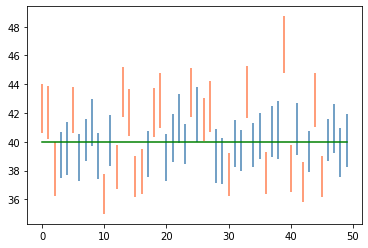

In [195]:
# GIVEN CODE:

res = []
def confidence_intervals(m=500, n=100):
    k = 4
    theta = 2
    
    # Your code goes here!
    #Proportion covering
    #Plot of 50 such CIs
    count = 0
    for i in range(m):
        s = stats.gamma(a=4, scale=10).rvs(size=n)
        
        dmean = s.mean()
        variance = s.var()
        
        z = 0.83
        ddet = z * variance**.5 / n**.5
        dbounds = dmean - ddet, dmean + ddet
        
        if dbounds[0] <= mean <= dbounds[1]:
            count += 1
            
        res.append(s)
            
    return count
    
cin = confidence_intervals()
print(f"Proportion of accurate intervals: {cin/500}")
    
import random
plots = random.sample(res, 50)
for i,s in enumerate(plots):
    dmean = s.mean()
    variance = s.var()

    z = 0.83
    ddet = z * variance**.5 / 100**.5
    dbounds = dmean - ddet, dmean + ddet

    if dbounds[0] <= mean <= dbounds[1]:
        plt.vlines(i, dbounds[0], dbounds[1], colors='steelblue')
    else:
        plt.vlines(i, dbounds[0], dbounds[1], colors='coral')
        

plt.plot(np.arange(0, 50), [mean] * 50, color='green')
plt.show()

**Part E:** Does the proportion of confidence intervals that cover the true mean of the distribution agree with the theory described in class?  Justify your conclusion. 

For such a small sample size, the confidence intervals that cover the mean do make up nearly the right proportion, at ~60% instead of 66%.

---

<a id='p3'></a>
[Back to top](#top)

### [20 points] Problem 3 - Lies, damned lies, and statistics

![frazz](http://3.bp.blogspot.com/-SbQUWRfHFXk/VdN8YWAy0WI/AAAAAAAAJLw/Ij5E0CbYk6g/s1600/lies3.gif)

Legend of your Data Science prowess has spread o'er the land. You have been contacted by a shadowy organization to assess whether there is statistical evidence for sea-level rise in the area of Honolulu, Hawaii. You obtain from the University of Hawaii Sea Level Center's [gigantic repository of sea-level data](https://uhslc.soest.hawaii.edu/data/?rq) the daily mean sea levels file included in the zip folder for this assignment. The columns are, in order, the year, month, day-of-month and measured sea level (in millimeters).

**Part A:** Load the data `sealevel_honolulu.csv` into a Pandas DataFrame. Rename the columns as something meaningful in the context of this problem. Print to the screen the first 7 rows from your updated DataFrame.

In [130]:
df = pd.read_csv("../data/sealevel_honolulu.csv",
                 header=None,
                 #dtype={0:'int32', 1:'int32', 2:'int32', 3:'float64'}
                ).rename(columns={0: "Year", 1: "Month", 2:"Day", 3: "Reading"})
df.tail(7)

,Year,Month,Day,Reading
41630,2018,12,25,1464
41631,2018,12,26,1465
41632,2018,12,27,1463
41633,2018,12,28,1470
41634,2018,12,29,1479
41635,2018,12,30,1480
41636,2018,12,31,1475


**Part B:**  Plot the raw time series of sea levels. Be sure to label your axes, including units. For the $x$-axis, place the $x$ tick marks on January 2 of each year that is divisible by 10 (i.e., 1920, 1930, ...), and label with that year. You may need to do additional processing in order to grab these indices. 

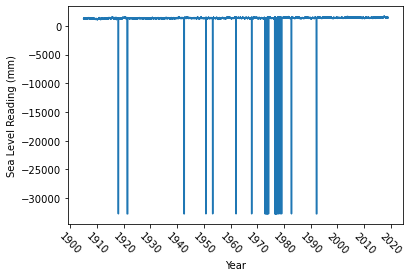

In [132]:
import datetime

plt.plot(
    df.apply(lambda r: datetime.datetime(year=r['Year'], month=r['Month'], day=r['Day']), axis=1),
    df['Reading']
)
ticks = [datetime.datetime(year=x, month=1, day=2) for x in np.arange(1900, 2030, 10)]
plt.xlabel("Year")
plt.ylabel("Sea Level Reading (mm)")
plt.xticks(ticks, [str(t.year) for t in ticks], rotation=-45)
plt.show()

**Part C:** Your time series plot from Part B should look pretty funky. Namely, there are a bunch of spikes in it! What do you think these spikes represent?

Now, clean your data set by doing the following:
* Remove any data points associated with these spikes. You may need to look back to some of the earlier in-class notebooks and Pandas tutorials for how to drop data points from a Pandas DataFrame. 
* Include only the data point from the second day of each month.
* Convert the sea-level data from millimeters to feet.

Then, make a similar plot to Part B, but of your cleaned data set. Be sure to label axes (including units) and only label January 2 of each year that is divisible by 10.

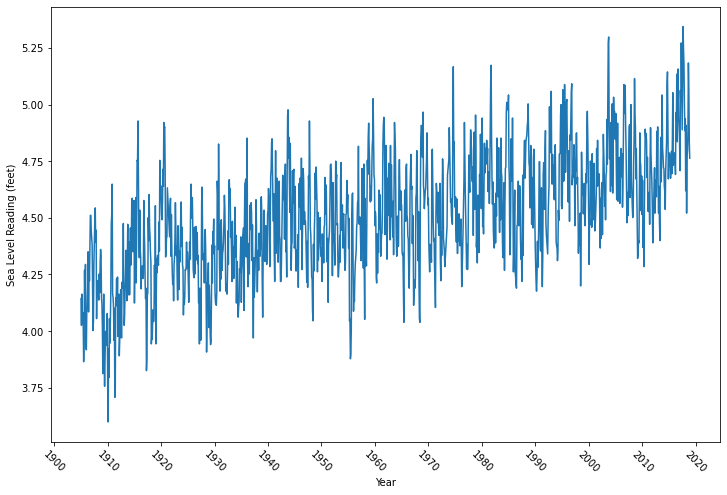

In [207]:
import datetime
kdf = df[df['Reading'] > -20]
kdf = kdf[kdf['Day'] == 2]
kdf['Reading'] = df['Reading'].apply(lambda v: v * 0.00328084)
plt.figure(figsize=(12, 8))
plt.plot(
    kdf.apply(
        lambda r: datetime.datetime(
            year=int(r['Year']),
            month=int(r['Month']),
            day=int(r['Day'])
        ),
        axis=1),
    kdf['Reading']
)
ticks = [datetime.datetime(year=x, month=1, day=2) for x in np.arange(1900, 2030, 10)]
plt.xlabel("Year")
plt.ylabel("Sea Level Reading (feet)")
plt.xticks(ticks, [str(t.year) for t in ticks], rotation=-45)

plt.show()

**Part D:** Your mysterious employer owns a lot of beachfront property in Hawaii and does not want to see people shy away from buying real estate and spending time near the sea. So, they really want to convince others to that the mean sea level in Honolulu in not increasing. Toward this end, your employer wants to find a decade of data (11 years, including both end points) that has a mean sea level which is not statistically significantly different from the mean sea level in the decade 2000-2010 (including data from both 2000 and 2010). Your employer wants you to use the 99% confidence/1% significance level because it sounds catchy in a press release, and wants the *earliest* decade possible.

Use your cleaned monthly data set from Part C to find the earliest decade for which you cannot conclude the mean sea level at Key West was statistically significantly different from the mean sea level in the 2000-2010 decade. You may want to write a helper function to compute the confidence intervals/perform the hypothesis test for you, because there are a LOT of possible 11-year periods to try. (*NOTE: The decade start / end years don't have to end with a 0. For example, 2008 - 2018 is the latest "decade" that exists in our dataset.*)

You may use either hypothesis tests or confidence intervals, but clearly state which method you will use, your results and show all work that leads to your conclusion. 

In [210]:
z = 2.576

# Using confidence intervals
x = 2000
oddecade = kdf[(kdf['Year'] <= x + 10) & (kdf['Year'] >= x)]
odmean = oddecade['Reading'].mean()
odstd = oddecade['Reading'].std()
odsqn = len(oddecade)**.5
odCI = odmean - z * odstd/odsqn, odmean + z * odstd/odsqn

for x in range(1900, 2011):
    decade = kdf[(kdf['Year'] <= x + 10) & (kdf['Year'] >= x)]
    mean = decade['Reading'].mean()
    std = decade['Reading'].std()
    sqn = len(decade)**.5
    CI = mean - z * std/sqn, mean + z * std/sqn
    
    if CI[0] < odmean < CI[1]:
        break
        
print(f"First decade insignificantly different from 2000-2010 with a confidence interval of 99%: {x}-{x+10}")


First decade insignificantly different from 2000-2010 with a confidence interval of 99%: 1987-1997
